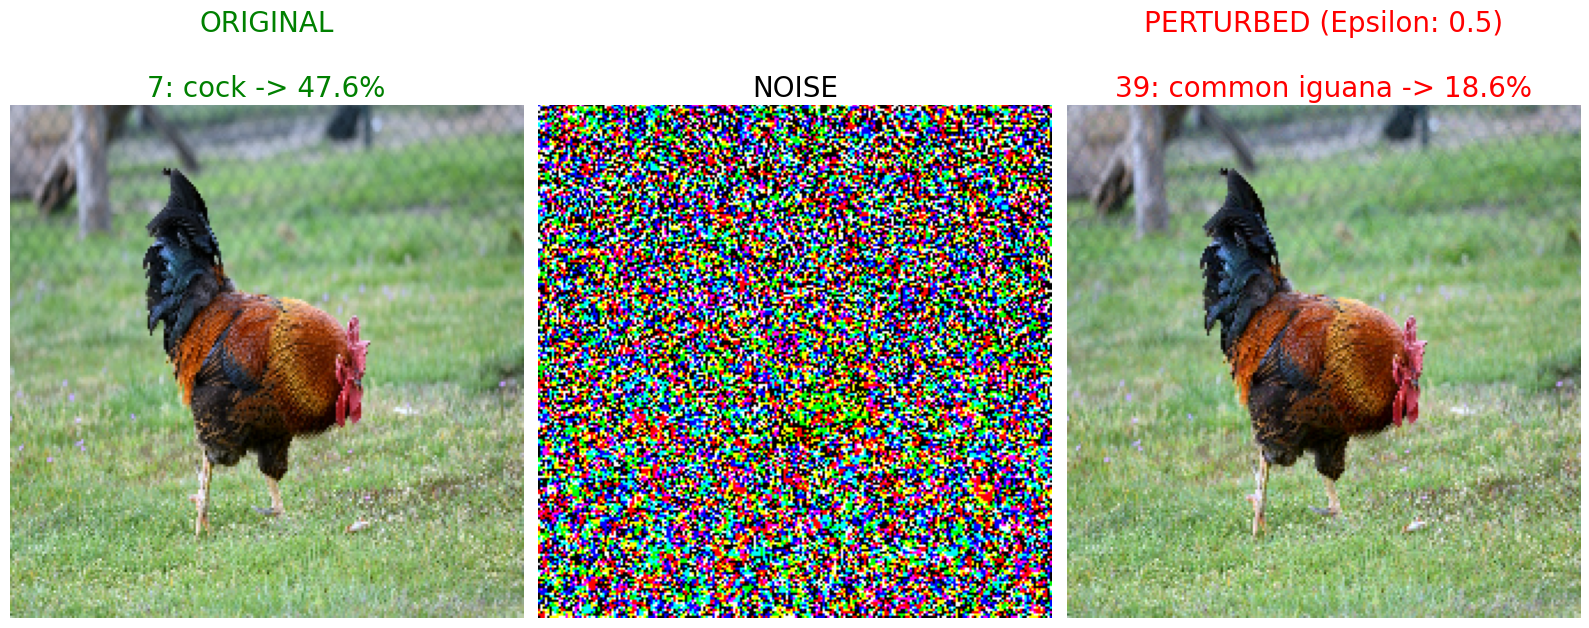

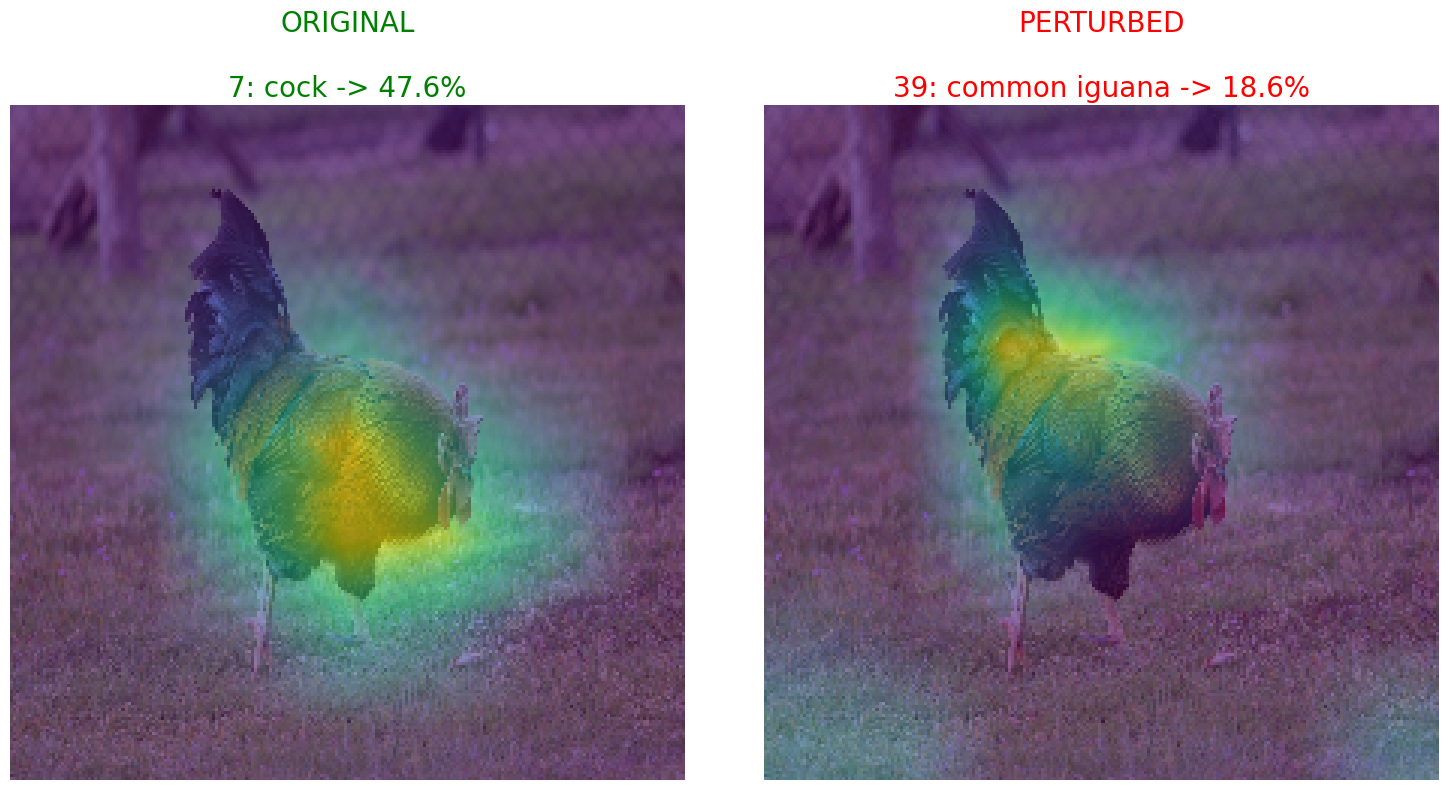

In [1]:
from functions import *

dataset: list = load_dataset(settings.images_path, added_new_images = False) # added_new_images = True solo quando vengono aggiunte nuove immagini al path.

model: torchvision.models = load_model_resnet50().to(settings.device)

# I-FGSM attack.

epsilon: float = 0.5
iters: int = 100
alpha: float = epsilon/iters

triplas: list = []
for image in dataset[:1]:
    loss_fn = nn.CrossEntropyLoss()
    original_image: torch.Tensor = read_image(image)
    original_image = preprocess(original_image, settings.img_resize).to(settings.device)
    perturbed_image: torch.Tensor = ifgsm_attack(model, loss_fn, original_image, epsilon, alpha, iters, settings.device)
    original_image = postprocess(original_image)
    perturbed_image = postprocess(perturbed_image)
    noise: torch.Tensor = perturbed_image - original_image
    tripla: tuple = (original_image, noise, perturbed_image)
    triplas.append(tripla)

for tripla in triplas:
    preds_display(model, tripla, epsilon, show_noise = True)
    gradcam_display(model, tripla, settings.img_resize)